## Case Study on Correlation and Regression

#### A textile company regularly spent money on five advertising companies for their ads. 
(Data set: Add_sales_data_2018.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read the Dataset

In [2]:
df=pd.read_csv('Add_sales_data_2018.csv')
df.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [3]:
df.shape

(205, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [5]:
df.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

### 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated

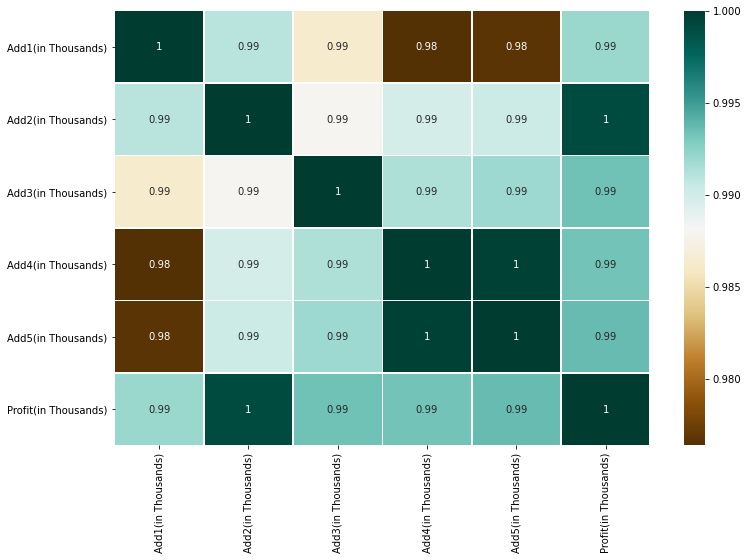

In [6]:
cormatrix=df.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(cormatrix,annot=True,linewidth=0.7,cmap="BrBG")
plt.show()

Findings

1.From the correlation metrics, it is clear that the variables have very strong positive correlation.

2.Among the five  features Add2 is having strong positive correlation (r=1) with the target, Profit.

### 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


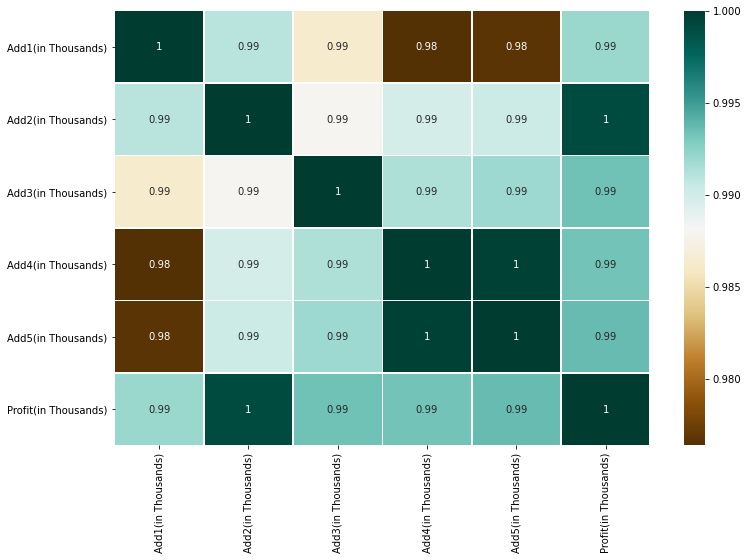

In [8]:
#check the correlation between variables in the data.
cormatrix=df.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(cormatrix,annot=True,linewidth=0.7,cmap="BrBG")
plt.show()

In [9]:
df.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [10]:
df.shape

(205, 7)

In [11]:
df1=df.drop(['Date'],axis=1)
df1.columns

Index(['Add1(in Thousands)', 'Add2(in Thousands)', 'Add3(in Thousands)',
       'Add4(in Thousands)', 'Add5(in Thousands)', 'Profit(in Thousands)'],
      dtype='object')

In [12]:
df1.shape

(205, 6)

In [13]:
# split the data set into two.Target in y and other features in x
y=df1['Profit(in Thousands)']
x=df1.drop(['Profit(in Thousands)'],axis=1)

# split reduced data set into 4 set
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)
lr=linear_model.LinearRegression() # creating an instance lr linear regression model.
model=lr.fit(x_train,y_train) #Fit the model to data with x_train & y_train

x.shape

(205, 5)

In [14]:
#testing the model using xtest. ytest is original data. 
predictions=model.predict(x_test)

In [15]:
print('The real outputs are:\n',y_test)
print((y_test.nunique()),'observations are taken for testing \n')

The real outputs are:
 15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
66     5038.222
111    5491.792
153    5019.997
96     4647.356
38     4486.380
24     4435.174
139    5300.437
112    5425.190
29     4482.183
19     4193.095
178    6062.457
Name: Profit(in Thousands), dtype: float64
52 observations are taken for testing 



In [16]:
print('The predicted outputs are :\n',predictions)

The predicted outputs are :
 [4152.066 4446.441 5131.898 4907.56  5004.282 4623.793 5384.175 5328.025
 5175.051 5956.323 5780.799 4997.719 5075.858 5784.54  4936.12  5065.652
 4190.965 5034.726 5015.536 5134.657 5145.131 5421.94  4569.293 4598.292
 4436.321 4175.677 5616.791 5667.25  4648.834 5717.838 5001.615 5182.368
 5017.503 5545.013 5013.207 5030.451 5108.626 4760.877 4606.34  4925.861
 5250.788 5038.222 5491.792 5019.997 4647.356 4486.38  4435.174 5300.437
 5425.19  4482.183 4193.095 6062.457]


In [17]:
mse=mean_squared_error(y_test,predictions)
print('MSE is :',mean_squared_error(y_test,predictions))


MSE is : 1.1930489604130207e-24


###### Findings:
1.MSE value for this model MSE=1.19 , Since the Mean squared error value is close to zero, the model is efficient enough.

2.Model which have least MSE is the best model.

3.The correlation matrix and the value of coefficient shows that Add2 company have very high effect on the profit.so spending 
  more amount on Add2 will be beneficial for the textile company.

### 3.Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

                                                      Amount spent

                                    Add1(in Thousands)     290
                                    Add2(in Thousands)     312
                                    Add3(in Thousands)     309
                                    Add4(in Thousands)     298
                                    Add5(in Thousands)     320

In [18]:
amount_spent = [[290,312,309,298,320]]
new_Profit = model.predict(amount_spent )
print("profit for new spent amount",new_Profit)

profit for new spent amount [5820.06]


##### predicted profit is 5820.06